# Codes from the Online Course

##

In [93]:
import pandas as pd
import csv
import seaborn as sns
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from datetime import date
import json
%matplotlib inline

In [94]:
list(range(0,5))

[0, 1, 2, 3, 4]

In [4]:
# importing stock from yahoo finance
tickers = ['IAU']
mydata =  pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source='yahoo',start='2000-1-1')['Adj Close']
    
mydata  

,IAU
Date,
2005-01-28,8.538000
2005-01-31,8.454000
2005-02-01,8.424000
2005-02-02,8.446000
2005-02-03,8.344000
...,...
2021-07-23,34.290001
2021-07-26,34.230000
2021-07-27,34.290001


<AxesSubplot:xlabel='Date'>

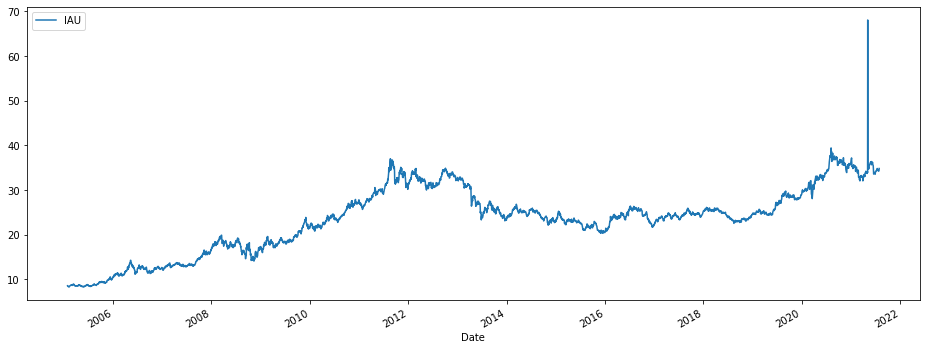

In [6]:
mydata.plot(figsize=(16,6))

In [7]:
# using rolling method ( also know as Moving Average)
# seven days
mydata.rolling(7).mean().head(20)

,IAU
Date,
2005-01-28,NaN
2005-01-31,NaN
2005-02-01,NaN
2005-02-02,NaN
2005-02-03,NaN
2005-02-04,NaN
2005-02-07,8.396572
2005-02-08,8.356572
2005-02-09,8.330000


<AxesSubplot:xlabel='Date'>

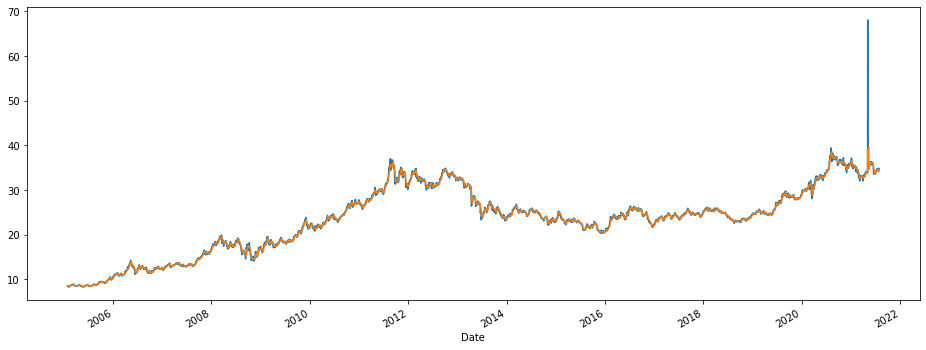

In [23]:
# ploting the 'IAU' series with 7 days moving average
mydata['IAU'].plot(figsize=(16,6))
mydata['IAU'].rolling(window=7).mean().plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

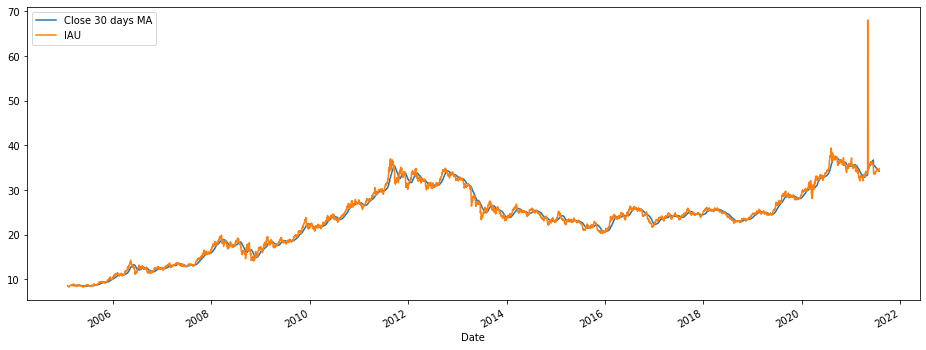

In [25]:
# it adds the legend automatically
mydata['Close 30 days MA'] = mydata['IAU'].rolling(window=30).mean() 
mydata[['Close 30 days MA', 'IAU']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

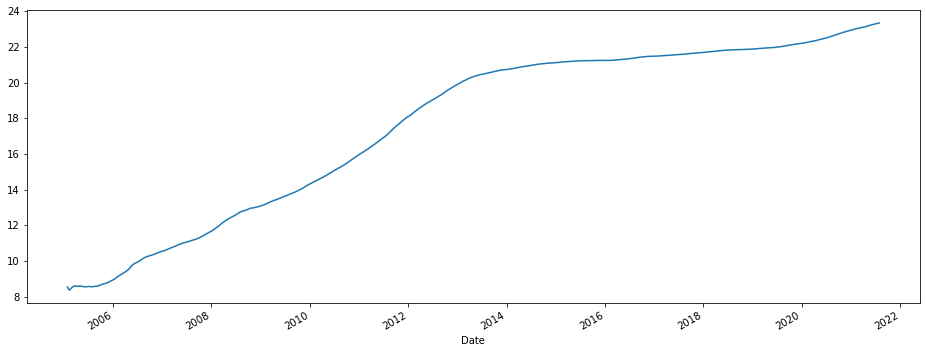

In [26]:
# expanding -  takes the average price for each day until the beginning 
mydata['IAU'].expanding().mean().plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

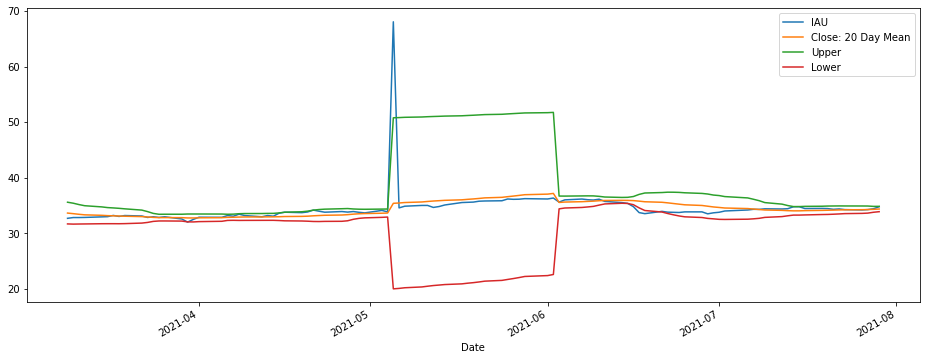

In [33]:
## Bollinger Bands
# Close 20 MA
mydata['Close: 20 Day Mean'] = mydata['IAU'].rolling(20).mean() 

# Upper = 20MA + 2*std(20)
mydata['Upper'] = mydata['Close: 20 Day Mean'] + 2*(mydata['IAU'].rolling(20).std())

# Lower = 20MA - 2*std(20)
mydata['Lower'] = mydata['Close: 20 Day Mean'] - 2*(mydata['IAU'].rolling(20).std())

#Close
mydata[['IAU','Close: 20 Day Mean','Upper','Lower']].tail(100).plot(figsize=(16,6))

# Stock Market Analysis Project

In [89]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


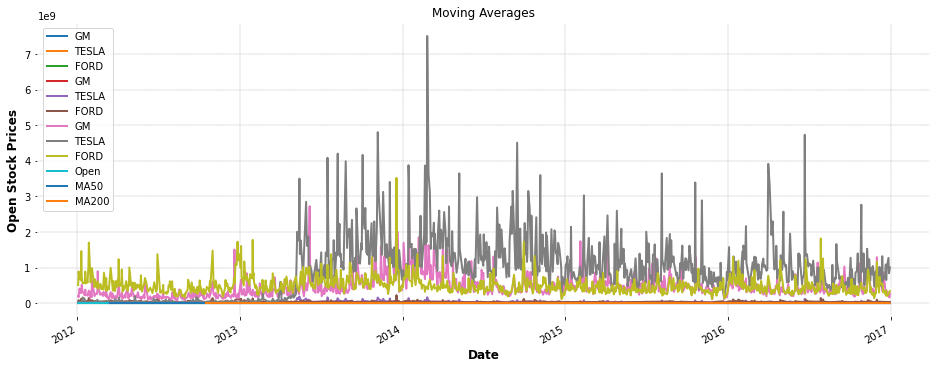

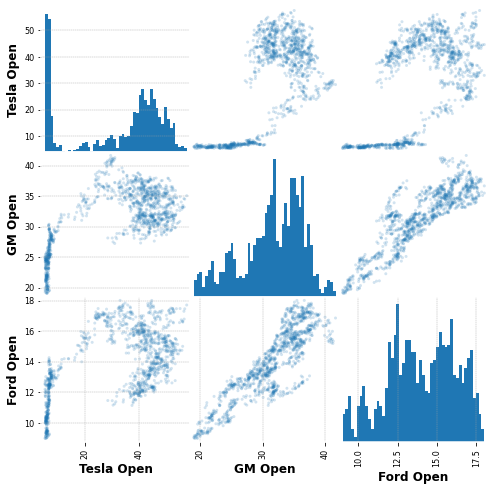

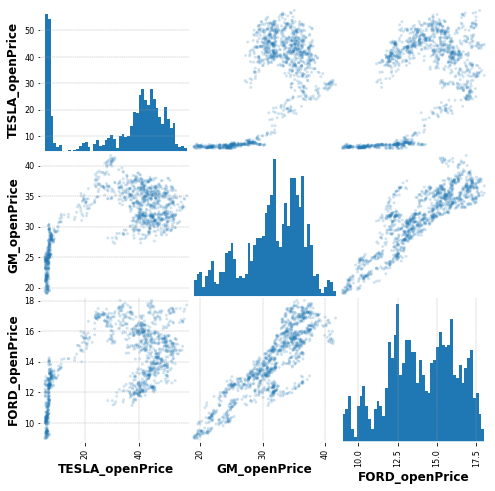

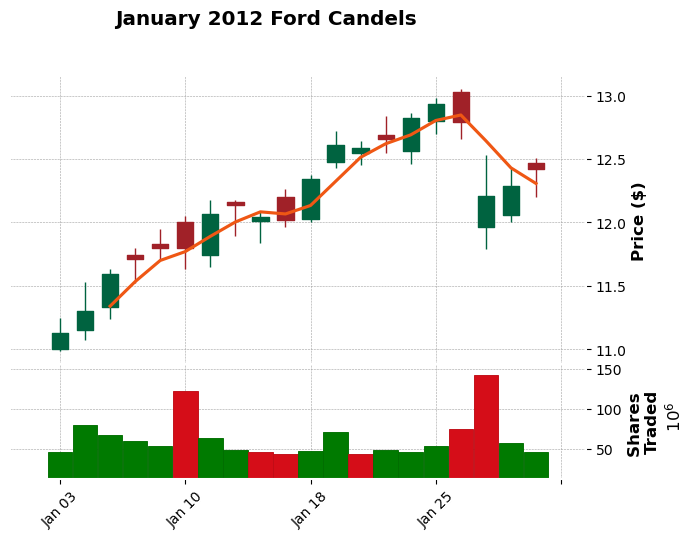

In [95]:
import mplfinance
import pandas as pd
import csv
import seaborn as sns
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from datetime import date
import json
%matplotlib inline

# importing stocks from yahoo finance: TESLA (TSLA), General Motors (GM), Ford (F)
start = date(2012,1,1)
end = date(2017,1,1)
GM = wb.DataReader('GM',data_source='yahoo',start=start,end=end) 
FORD = wb.DataReader('F',data_source='yahoo',start=start,end=end)
TESLA = wb.DataReader('TSLA',data_source='yahoo',start=start,end=end)
# for t in tickers:
#     mydata[t] = wb.DataReader(t,data_source='yahoo',start='2012-1-1',end='2017-1-1')

GM.head()

FORD.head()

TESLA.head()

TESLA.tail()

# Plotting the Open Price of the stocks
GM['Open'].plot(label='GM',figsize=(16,6), title= 'Open Price')
TESLA['Open'].plot(label='TESLA')
FORD['Open'].plot(label='FORD')
plt.legend()
plt.ylabel('Open Stock Prices')


# Plotting the Volume of the stocks
GM['Volume'].plot(label='GM',figsize=(16,6), title= 'Volume')
TESLA['Volume'].plot(label='TESLA')
FORD['Volume'].plot(label='FORD')
plt.legend()


# The date of the spike on trading Volume of FORD
# FORD['Volume'].argmax()
FORD['Volume'].idxmax()

GM['Total Traded'] = GM['Open'] * GM['Volume']
GM.tail()

FORD['Total Traded'] = FORD['Open'] * FORD['Volume']
FORD.tail()

TESLA['Total Traded'] = TESLA['Open'] * TESLA['Volume']
TESLA.tail()

# Plotting the Total Traded of the stocks
GM['Total Traded'].plot(label='GM',figsize=(16,6), title= 'Total Traded')
TESLA['Total Traded'].plot(label='TESLA')
FORD['Total Traded'].plot(label='FORD')
plt.legend()

# The date of the spike on Total trades of Tesla
# FORD['Volume'].argmax()
TESLA['Total Traded'].idxmax()



# MA (Moving Averages). Plot out the MA50 and MA200 for GM
GM['Open'].plot(label= 'Open',figsize=(16,6), title= 'Moving Averages')
GM['Open'].rolling(window=50).mean().plot(label= 'MA50')
GM['Open'].rolling(window=200).mean().plot(label= 'MA200')
plt.legend()

'''
Plotting the scatter matrix Plot 
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#visualization-scatter-matrix
''' 

from pandas.plotting import scatter_matrix

new_df = pd.DataFrame()

#my way to think
new_df['TESLA_openPrice'] = TESLA['Open']
new_df['GM_openPrice'] = GM['Open']
new_df['FORD_openPrice'] = FORD['Open'] 


#course code
car_comp = pd.concat([TESLA['Open'],GM['Open'],FORD['Open']],axis=1)
car_comp.columns = ['Tesla Open','GM Open','Ford Open']

new_df.tail()

car_comp.tail()

# You can use a semi-colon to remove the axes print outs
scatter_matrix(car_comp,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

# scatter_matrix(new_df, alpha=0.2, figsize=(16, 6), diagonal="hist");

# You can use a semi-colon to remove the axes print outs
scatter_matrix(new_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});



### Bonus Visualization Task!

#Create a CandleStick chart for Ford in January 2012
#https://matplotlib.org/1.5.3/examples/pylab_examples/finance_demo.html


import mplfinance
from matplotlib.dates import DateFormatter, date2num, WeekdayLocator, DayLocator, MONDAY
# from mplfinance.original_flavor import candlestick_ohlc
# deprecated from matplotlib.finance import candlestick_ohlc

'''
I used mplfinance library to solve de Deprecated issue
https://openwritings.net/pg/mplfinance/python-draw-candlestickohlc-using-new-mplfinance
'''

# taking teh January data
FORD.loc['2012-01':'2012-01']

# Rest the index to get a column of January Dates
# ford_reset = FORD.loc['2012-01':'2012-01'].reset_index()

# ford_reset.tail()

# # Create a new column of numerical "date" values for matplotlib to use
# ford_reset['date_ax'] = ford_reset['Date'].apply(lambda date: date2num(date))
# ford_values = [tuple(vals) for vals in ford_reset[['date_ax', 'Open', 'High', 'Low', 'Close']].values]


# mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
# alldays = DayLocator()              # minor ticks on the days
# weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
# dayFormatter = DateFormatter('%d')      # e.g., 12


#Plot it
# fig, ax = plt.subplots()
# fig.subplots_adjust(bottom=0.2)
# ax.xaxis.set_major_locator(mondays)
# ax.xaxis.set_minor_locator(alldays)
# ax.xaxis.set_major_formatter(weekFormatter)


# mplfinance.candlestick_ohlc(ax, quotes, width=0.2, colorup=’k’, colordown=’r’, alpha=1.0)
# mplfinance.plot(ax, ford_values, width=0.6, colorup='g',colordown='r')
mplfinance.plot(FORD.loc['2012-01':'2012-01'],type='candle',
                    style='charles', title= 'January 2012 Ford Candels',
                    ylabel= 'Price ($)', ylabel_lower='Shares \nTraded',
                    volume= True, mav=(3))


## Daily Percentage Change (daily return)

$ r_t = \frac{p_t}{p_{t-1}} -1$

In [96]:
((FORD['Close']/FORD['Close'].shift(1))-1)

Date
2012-01-03         NaN
2012-01-04    0.015274
2012-01-05    0.025664
2012-01-06    0.010354
2012-01-09    0.007686
                ...   
2016-12-23    0.004839
2016-12-27   -0.005618
2016-12-28   -0.011299
2016-12-29   -0.001633
2016-12-30   -0.008177
Name: Close, Length: 1258, dtype: float64

In [97]:
FORD['returns'] = ((FORD['Close']/FORD['Close'].shift(1))-1)
GM['returns'] = ((GM['Close']/GM['Close'].shift(1))-1)
TESLA['returns'] = ((TESLA['Close']/TESLA['Close'].shift(1))-1)

# or could I use
# tesla['returns'] = tesla['Close'].pct_change(1)

In [98]:
FORD.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686


In [99]:
GM.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,0.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,0.048227
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,0.033829
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,-0.003490


In [100]:
TESLA.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616,2.685921e+07,NaN
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542,1.777512e+07,-0.013177
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424,2.791268e+07,-0.021292
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382,2.682736e+07,-0.007743
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450,2.421900e+07,0.012635


<AxesSubplot:>

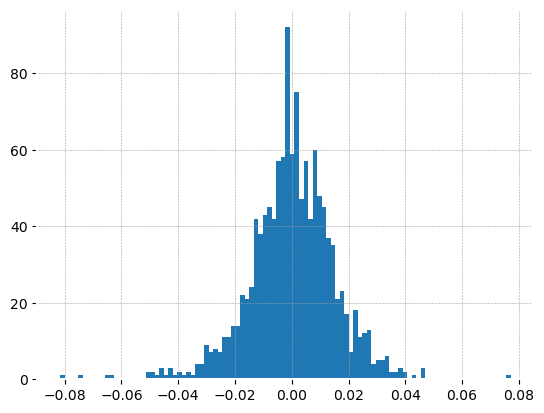

In [101]:
FORD['returns'].hist(bins=100)

<AxesSubplot:>

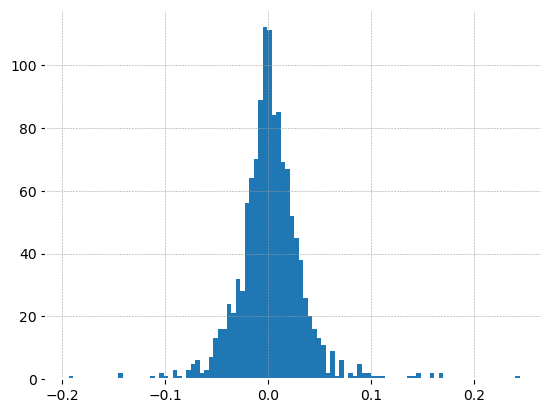

In [102]:
TESLA['returns'].hist(bins=100)

<AxesSubplot:>

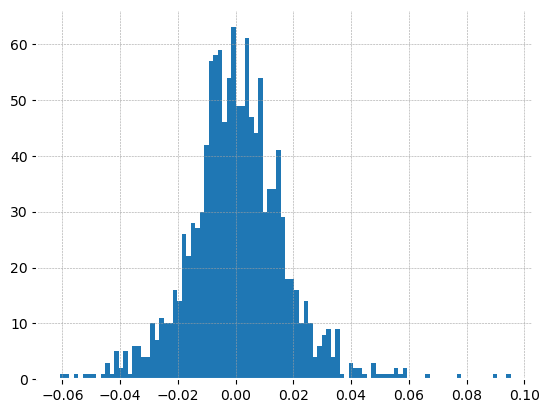

In [103]:
GM['returns'].hist(bins=100)

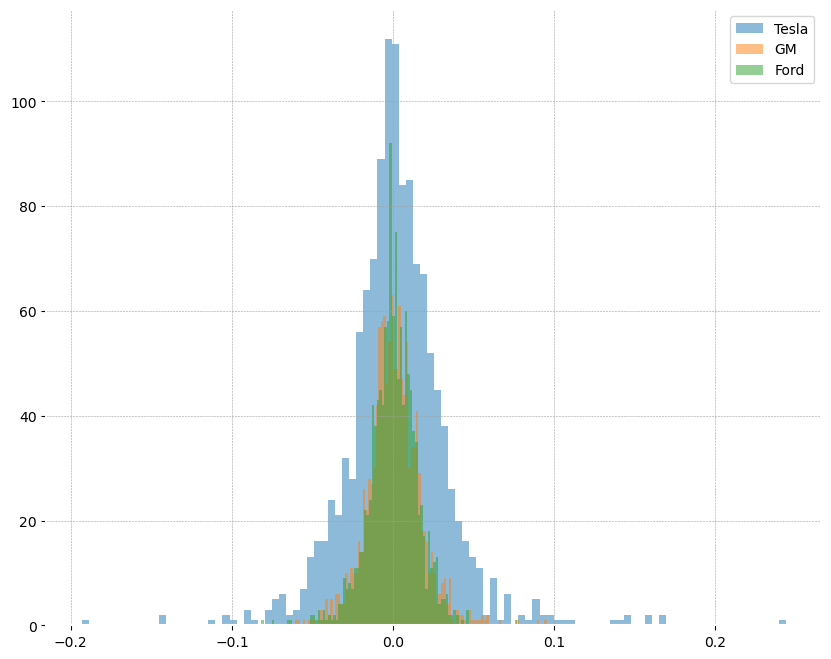

In [104]:
TESLA['returns'].hist(bins=100,label='Tesla',figsize=(10,8),alpha=0.5)
GM['returns'].hist(bins=100,label='GM',alpha=0.5)
FORD['returns'].hist(bins=100,label='Ford',alpha=0.5)
plt.legend()

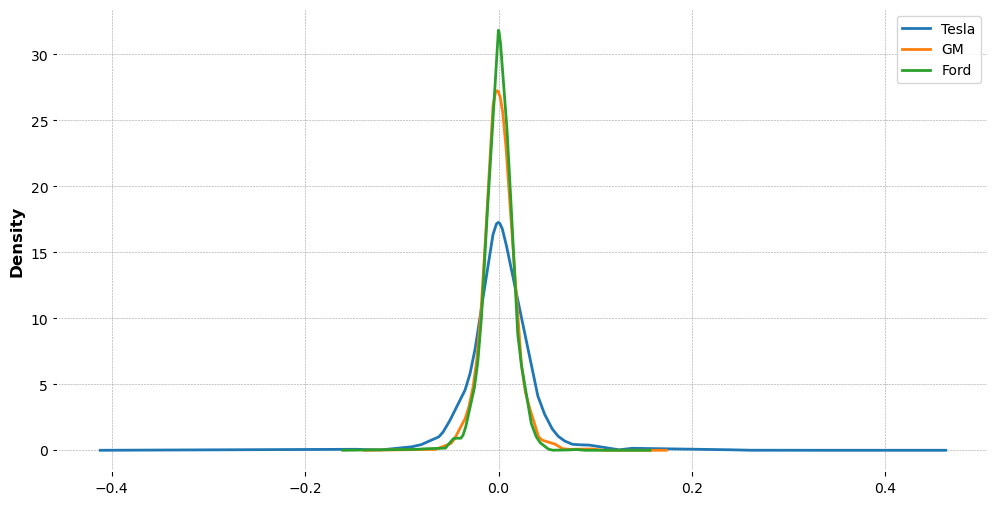

In [105]:
TESLA['returns'].plot(kind='kde',label='Tesla',figsize=(12,6))
GM['returns'].plot(kind='kde',label='GM')
FORD['returns'].plot(kind='kde',label='Ford')
plt.legend()

<AxesSubplot:>

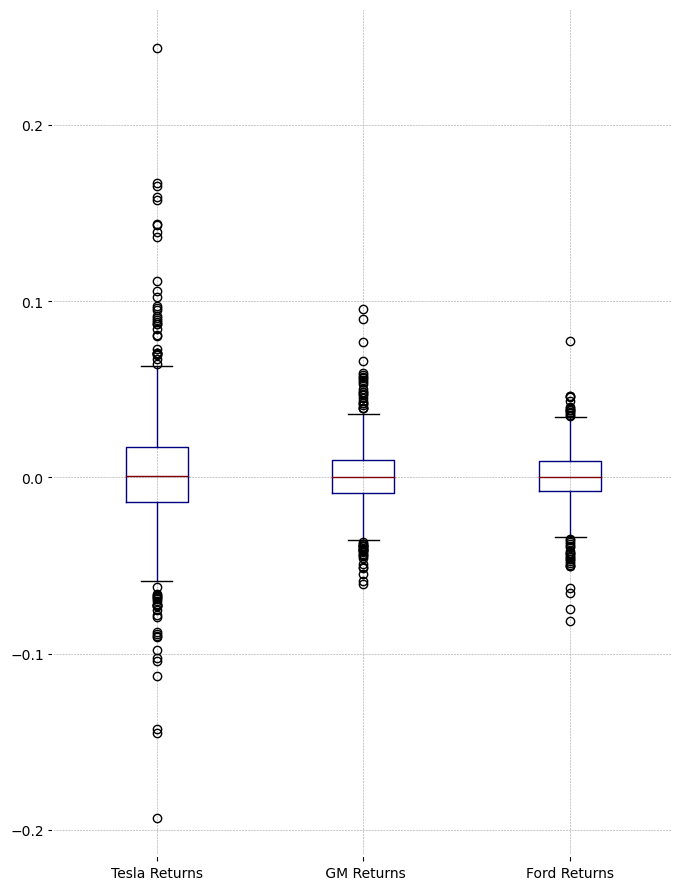

In [106]:
box_df = pd.concat([TESLA['returns'],GM['returns'],FORD['returns']],axis=1)
box_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']
box_df.plot(kind='box',figsize=(8,11),colormap='jet')

## Comparing Daily Returns between Stocks

In [107]:
daily_returns_df = pd.concat([TESLA['returns'],GM['returns'],FORD['returns']],axis=1)
daily_returns_df.columns = ['Tesla Returns',' GM Returns','Ford Returns']

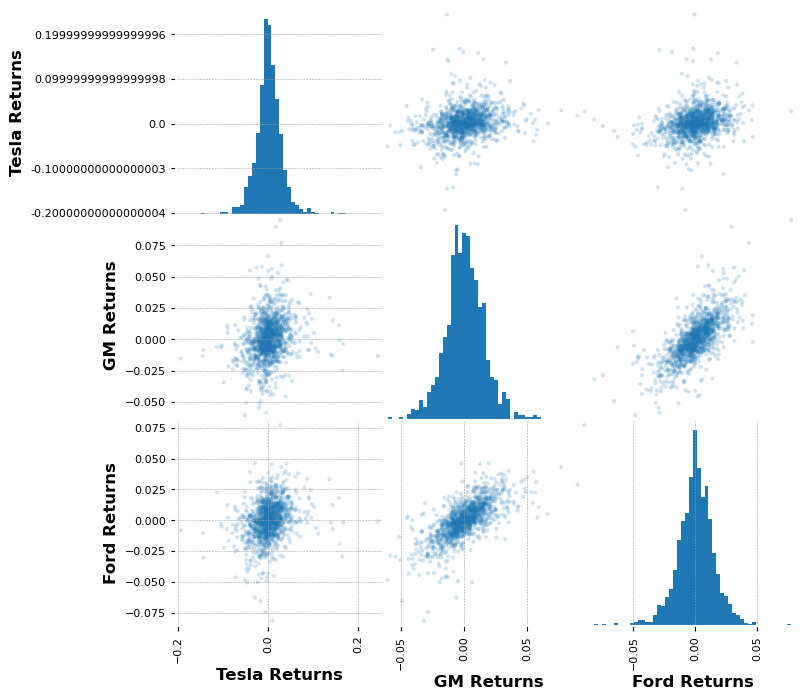

In [108]:
#looks like Ford and GM do have some relationship
scatter_matrix(daily_returns_df,figsize=(8,8),alpha=0.2,hist_kwds={'bins':50});

Text(0.5, 0, 'GM Returns')

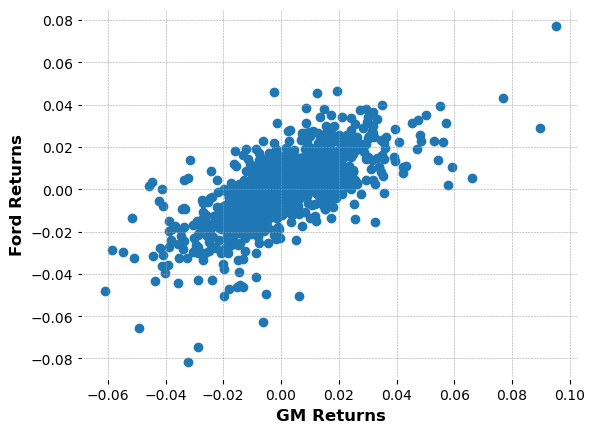

In [112]:
plt.scatter(daily_returns_df[' GM Returns'],daily_returns_df['Ford Returns'])
plt.ylabel('Ford Returns')
plt.xlabel('GM Returns')

# Cumulative Return (is computed relative to the day investment is made)

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

In [114]:
FORD.head()

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns
Date,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686


In [119]:
FORD['daily_cumulative_return'] = (1 + FORD['returns']).cumprod()
GM['daily_cumulative_return'] = (1 + GM['returns']).cumprod()
TESLA['daily_cumulative_return'] = (1 + TESLA['returns']).cumprod()

In [120]:
FORD

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,daily_cumulative_return
Date,,,,,,,,,
2012-01-03,11.25,10.99,11.00,11.13,45709900.0,7.544740,5.028089e+08,NaN,NaN
2012-01-04,11.53,11.07,11.15,11.30,79725200.0,7.659981,8.889359e+08,0.015274,1.015274
2012-01-05,11.63,11.24,11.33,11.59,67877500.0,7.856563,7.690521e+08,0.025664,1.041330
2012-01-06,11.80,11.52,11.74,11.71,59840700.0,7.937905,7.025298e+08,0.010354,1.052111
2012-01-09,11.95,11.70,11.83,11.80,53981500.0,7.998916,6.386011e+08,0.007686,1.060198
...,...,...,...,...,...,...,...,...,...
2016-12-23,12.46,12.36,12.43,12.46,15621200.0,10.150093,1.941715e+08,0.004839,1.119497
2016-12-27,12.51,12.36,12.43,12.39,19467400.0,10.093071,2.419798e+08,-0.005618,1.113208
2016-12-28,12.45,12.22,12.37,12.25,26875400.0,9.979024,3.324487e+08,-0.011299,1.100629


In [121]:
GM

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,daily_cumulative_return
Date,,,,,,,,,
2012-01-03,21.180000,20.750000,20.830000,21.049999,9321300.0,16.269407,1.941627e+08,NaN,NaN
2012-01-04,21.370001,20.750000,21.049999,21.150000,7856700.0,16.346703,1.653835e+08,0.004751,1.004751
2012-01-05,22.290001,20.959999,21.100000,22.170000,17880600.0,17.135054,3.772807e+08,0.048227,1.053207
2012-01-06,23.030001,22.240000,22.260000,22.920000,18234500.0,17.714725,4.059000e+08,0.033829,1.088836
2012-01-09,23.430000,22.700001,23.200001,22.840000,12084500.0,17.652889,2.803604e+08,-0.003490,1.085036
...,...,...,...,...,...,...,...,...,...
2016-12-23,35.869999,35.540001,35.830002,35.689999,9351200.0,31.217722,3.350535e+08,0.000000,1.695487
2016-12-27,35.930000,35.500000,35.799999,35.540001,6008700.0,31.086515,2.151115e+08,-0.004203,1.688361
2016-12-28,35.799999,35.130001,35.740002,35.150002,8451900.0,30.745390,3.020709e+08,-0.010974,1.669834


In [122]:
TESLA

,High,Low,Open,Close,Volume,Adj Close,Total Traded,returns,daily_cumulative_return
Date,,,,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500,5.616000,2.685921e+07,NaN,NaN
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500,5.542000,1.777512e+07,-0.013177,0.986823
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500,5.424000,2.791268e+07,-0.021292,0.965812
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500,5.382000,2.682736e+07,-0.007743,0.958333
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000,5.450000,2.421900e+07,0.012635,0.970442
...,...,...,...,...,...,...,...,...,...
2016-12-23,42.689999,41.542000,41.599998,42.667999,23352500,42.667999,9.714640e+08,0.023459,7.597578
2016-12-27,44.450001,42.883999,42.976002,43.905998,29578500,43.905998,1.271166e+09,0.029015,7.818019
2016-12-28,44.759998,43.439999,44.306000,43.948002,18912500,43.948002,8.379372e+08,0.000957,7.825499


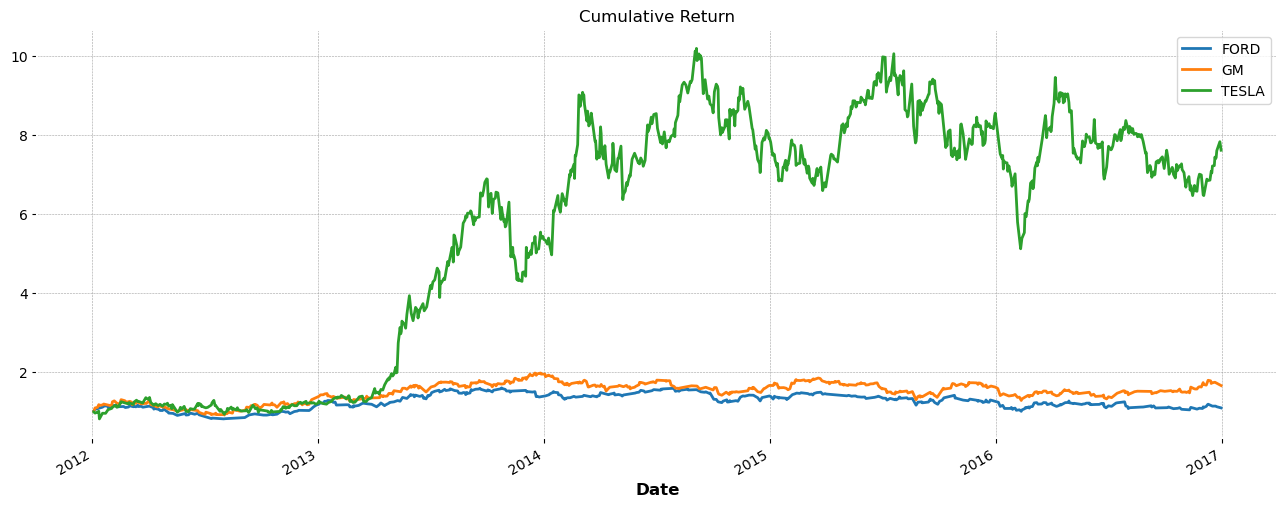

In [123]:
FORD['daily_cumulative_return'].plot(label='FORD', figsize=(16,6), title= 'Cumulative Return')
GM['daily_cumulative_return'].plot(label='GM')
TESLA['daily_cumulative_return'].plot(label='TESLA')
plt.legend()